In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-dataset/Student_performance_data _.csv


In [2]:
from sklearn.model_selection import train_test_split 

In [3]:
df = pd.read_csv("/kaggle/input/students-performance-dataset/Student_performance_data _.csv")
df

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [4]:
df.isna().sum()

StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

In [5]:
df.describe()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,2196.500000,16.468645,0.510870,0.877508,1.746237,9.771992,14.541388,0.301421,2.122074,0.383361,0.303512,0.196906,0.157191,1.906186,2.983696
std,690.655244,1.123798,0.499986,1.028476,1.000411,5.652774,8.467417,0.458971,1.122813,0.486307,0.459870,0.397744,0.364057,0.915156,1.233908
min,1001.000000,15.000000,0.000000,0.000000,0.000000,0.001057,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1598.750000,15.000000,0.000000,0.000000,1.000000,5.043079,7.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.174803,2.000000
50%,2196.500000,16.000000,1.000000,0.000000,2.000000,9.705363,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.893393,4.000000
75%,2794.250000,17.000000,1.000000,2.000000,2.000000,14.408410,22.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,2.622216,4.000000
max,3392.000000,18.000000,1.000000,3.000000,4.000000,19.978094,29.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,4.000000,4.000000


In [6]:
df = df.drop(columns=['GPA', 'StudentID'])

In [7]:
X = df.drop(columns=['GradeClass'])
y = df['GradeClass']
X

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering
0,17,1,0,2,19.833723,7,1,2,0,0,1,0
1,18,0,0,1,15.408756,0,0,1,0,0,0,0
2,15,0,2,3,4.210570,26,0,2,0,0,0,0
3,17,1,0,3,10.028829,14,0,3,1,0,0,0
4,17,1,0,2,4.672495,17,1,3,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
2387,18,1,0,3,10.680555,2,0,4,1,0,0,0
2388,17,0,0,1,7.583217,4,1,4,0,1,0,0
2389,16,1,0,2,6.805500,20,0,2,0,0,0,1
2390,16,1,1,0,12.416653,17,0,2,0,1,1,0


In [8]:
X = X.to_numpy()
y = y.to_numpy()

# Create train, validation, and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

# Define architecture
Input Layer:

Number of Neurons: 12 (one for each feature)
Activation Function: None
First Hidden Layer:

Number of Neurons: 32
Activation Function: ReLU
Output Layer:

Number of Neurons: 5 (corresponding to the 5 classes: A, B, C, D, F)
Activation Function: Softmax

# Step 1: Initialize Parameters

1. Why Multiply W1 and W2 by 0.01?
What Are Weights (W1 and W2)?
Weights are values that determine how much influence each input has on the neuron's output. During training, the neural network adjusts these weights to better predict the target variable.
Why Are Weights Initialized Randomly?
If all weights were initialized to the same value (e.g., all 1s or all 0s), all neurons in a layer would produce the same output, making it impossible for the network to learn different features. Random initialization ensures that different neurons start with different outputs, allowing the network to learn diverse features from the data.
Why Multiply by 0.01?
Control the Initial Output: If weights are too large, the initial outputs of the neurons might be too large, leading to large values before the activation function. This can cause problems like:
Saturation: Some activation functions (like sigmoid or tanh) can "saturate," meaning they produce outputs very close to 1 or -1. When this happens, the gradient (used for updating weights) becomes very small, slowing down learning.

Unstable Training: Large initial weights can lead to very large gradients, causing unstable updates during training, which might make the model diverge (not learn properly).

Scaling Down: By multiplying the weights by 0.01, we ensure that the initial outputs are small and manageable. This helps the network start learning in a stable manner.

2. Why Set b1 and b2 to Zero?
What Are Biases (b1 and b2)?
Biases are values added to the weighted sum of inputs before applying the activation function. They allow the model to shift the activation function to fit the data better.
Why Not Initialize Biases Randomly?
Symmetry Breaking Isn’t Needed: Unlike weights, biases don’t need to break symmetry. Their role is just to shift the activation function. Starting all biases at zero doesn’t prevent the network from learning diverse features because the weights are already initialized randomly.

Stable Start: By initializing biases to zero, the network starts with a simple setup where the initial activations depend only on the inputs and the random weights. This simplicity can make the learning process smoother.
Gradients Will Still Flow: During training, the biases will be adjusted based on the loss function. Even though they start at zero, the learning process will update them to appropriate values.

In [9]:
def initialize_parameters(input_size: int, hidden_size: int, output_size: int, seed: int = 1) -> tuple:
    """
    Initializes weights and biases for a neural network.

    Args:
        input_size: Number of input features.
        hidden_size: Number of neurons in the hidden layer.
        output_size: Number of output classes.
        seed: Seed number.

    Returns:
        A tuple of weights and biases: (W1, b1, W2, b2)
    """

    np.random.seed(seed)  # For reproducibility

    W1 = np.random.randn(input_size, hidden_size) * 0.01
    b1 = np.zeros((1, hidden_size))
    W2 = np.random.randn(hidden_size, output_size) * 0.01
    b2 = np.zeros((1, output_size))

    return W1, b1, W2, b2


# Step 2: Define Activation Functions
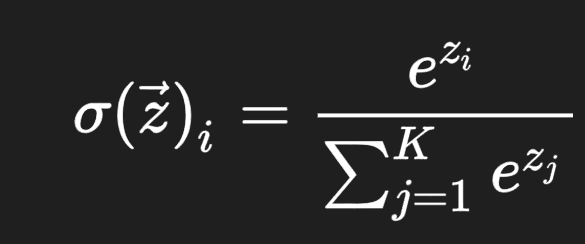

In [10]:
def relu(z: np.ndarray) -> np.ndarray:
    """Applies the ReLU activation function element-wise.

    Args:
        z: Input array of shape (num_samples, num_classes).

    Returns:
        Output array with the same shape as z, where each element is the maximum of 0 and the corresponding element in z.
    """
    return np.maximum(z, 0)

def softmax(z: np.ndarray) -> np.ndarray:
    """Computes the softmax function for each row of the input array.

    Args:
        z: Input array of shape (num_samples, num_classes).

    Returns:
        Softmax output array of the same shape as z.
    """
    exp_z = np.exp(z) # exponential of each element
    return exp_z / np.sum(exp_z, axis=1, keepdims=True) # divide exponential of each element by the sum of exponential of each element per row. The sum is broadcasted to all columns


# Step 3: Forward Propagation

In [11]:
def forward(X: np.ndarray, W1: np.ndarray, b1: np.ndarray, W2: np.ndarray, b2: np.ndarray) -> tuple:
    """Performs a forward pass through a two-layer neural network.

    Args:
        X: Input data, shape (num_samples, input_size).
        W1: Weights of the first layer, shape (input_size, hidden_size).
        b1: Biases of the first layer, shape (1, hidden_size).
        W2: Weights of the second layer, shape (hidden_size, output_size).
        b2: Biases of the second layer, shape (1, output_size).

    Returns:
        A tuple containing:
            - Z1: Pre-activations of the first layer, shape (num_samples, hidden_size).
            - A1: Activations of the first layer (after ReLU), shape (num_samples, hidden_size).
            - Z2: Pre-activations of the second layer, shape (num_samples, output_size).
            - A2: Activations of the second layer (softmax output), shape (num_samples, output_size).
    """

    Z1 = X @ W1 + b1
    A1 = relu(Z1)
    Z2 = A1 @ W2 + b2
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2


# Step 4: Compute the Loss
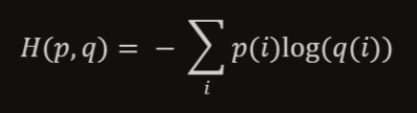
i represents the class

In [12]:
import numpy as np

def cross_entropy_loss(yhat: np.ndarray, y: np.ndarray) -> float:
    """Calculates the cross-entropy loss between predicted probabilities and true labels.

    Args:
        yhat: Predicted probabilities for each class, shape (num_samples, num_classes).
        y: True labels of shape (num_samples, 1).

    Returns:
        float: The cross-entropy loss.
    """
    
    # Convert to int for indexing
    y = y.astype(int) # convert to int
    
    # Convert y to one-hot encoding
    num_classes = yhat.shape[1]
    y_one_hot = np.eye(num_classes)[y.squeeze()] # creates identity matrix and index matrix at values in y to create 2D one hot encoding

    # Calculate cross-entropy loss
    loss = -np.sum(y_one_hot * np.log(yhat + 1e-10), axis=1) # 1e-10 to prevent log(0) and sum along columns
    return np.mean(loss) # average cross-entropy loss across all samples


# Step 5: Backward Propagation
* dloss/dW2
* dloss/db2
* dloss/dW1
* dloss/db1
$$ a = \frac {b} { \sqrt{2c} } $$

$$ a = \frac {b} { \sqrt{2c} } $$

In [13]:
def backward(X, y, W1, b1, W2, b2, Z1, A1, Z2, A2):
    m = X.shape[0]
    num_classes = A2.shape[1]
    
    # Convert y to integers and one-hot encode
    y_int = y.astype(int)
    y_one_hot = np.eye(num_classes)[y_int]
    
    # For softmax + cross-entropy, dL/dZ2 simplifies to A2 - y
    dZ2 = A2 - y_one_hot
    
    # Calculate gradients
    dW2 = (A1.T @ dZ2) / m
    db2 = np.sum(dZ2, axis=0, keepdims=True) / m
    
    dA1 = dZ2 @ W2.T
    dZ1 = dA1 * (Z1 > 0)  # ReLU derivative
    
    dW1 = (X.T @ dZ1) / m
    db1 = np.sum(dZ1, axis=0, keepdims=True) / m
    
    return dW1, db1, dW2, db2

# Step 6: Update Parameters

In [14]:
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    """Updates model parameters using gradient descent.

    Args:
        W1, b1, W2, b2: Current model parameters.
        dW1, db1, dW2, db2: Gradients of the loss with respect to parameters.
        learning_rate: Learning rate for the update.

    Returns:
        Updated model parameters: W1, b1, W2, b2.
    """

    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2

    return W1, b1, W2, b2

# Step 7: Training Loop

In [15]:
def predict(X, W1, b1, W2, b2):
    _, _, _, A2 = forward(X, W1, b1, W2, b2)
    return np.argmax(A2, axis=1)

def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

In [16]:
def train(X_train, y_train, X_val, y_val, learning_rate, epochs):
    """Trains the neural network.

    Args:
        X_train: Input data, shape (num_samples, input_size).
        y_train: True labels, shape (num_samples, output_size).
        learning_rate: Learning rate for the optimizer.
        epochs: Number of training epochs.
    
    Returns:
        Final model parameters: W1, b1, W2, b2.
    """

    W1, b1, W2, b2 = initialize_parameters(12, 32, 5)
    for epoch in range(epochs):
        # Process the entire dataset
        Z1, A1, Z2, A2 = forward(X_train, W1, b1, W2, b2)
        loss = cross_entropy_loss(A2, y_train)
        dW1, db1, dW2, db2 = backward(X_train, y_train, W1, b1, W2, b2, Z1, A1, Z2, A2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)
        y_pred_val = predict(X_val, W1, b1, W2, b2)
        acc = accuracy(y_val, y_pred_val)
        print(f"Epoch {epoch+1}, Loss: {loss:.4f}, Accuracy: {acc:.4f}")

    return W1, b1, W2, b2

In [17]:
# Hyperparameters
learning_rate = 0.01
epochs = 10000

# Train the model
W1, b1, W2, b2 = train(X_train, y_train, X_val, y_val, learning_rate, epochs)

Epoch 1, Loss: 1.6073, Accuracy: 0.2589
Epoch 2, Loss: 1.6026, Accuracy: 0.4843
Epoch 3, Loss: 1.5977, Accuracy: 0.4843
Epoch 4, Loss: 1.5926, Accuracy: 0.4843
Epoch 5, Loss: 1.5871, Accuracy: 0.4843
Epoch 6, Loss: 1.5811, Accuracy: 0.4843
Epoch 7, Loss: 1.5743, Accuracy: 0.4843
Epoch 8, Loss: 1.5666, Accuracy: 0.4843
Epoch 9, Loss: 1.5576, Accuracy: 0.4843
Epoch 10, Loss: 1.5473, Accuracy: 0.4843
Epoch 11, Loss: 1.5353, Accuracy: 0.4843
Epoch 12, Loss: 1.5215, Accuracy: 0.4843
Epoch 13, Loss: 1.5057, Accuracy: 0.4843
Epoch 14, Loss: 1.4877, Accuracy: 0.4843
Epoch 15, Loss: 1.4675, Accuracy: 0.4843
Epoch 16, Loss: 1.4451, Accuracy: 0.4843
Epoch 17, Loss: 1.4208, Accuracy: 0.4843
Epoch 18, Loss: 1.3951, Accuracy: 0.4843
Epoch 19, Loss: 1.3686, Accuracy: 0.4843
Epoch 20, Loss: 1.3422, Accuracy: 0.4843
Epoch 21, Loss: 1.3168, Accuracy: 0.4843
Epoch 22, Loss: 1.2932, Accuracy: 0.4843
Epoch 23, Loss: 1.2723, Accuracy: 0.4843
Epoch 24, Loss: 1.2543, Accuracy: 0.4843
Epoch 25, Loss: 1.2393, A

# Step 8: Prediction and Evaluation

In [18]:
# 3. Make predictions
y_pred_test = predict(X_test, W1, b1, W2, b2)

test_accuracy = accuracy(y_test, y_pred_test)

print(f"Test Accuracy: {test_accuracy:.4f}")

Test Accuracy: 0.7474
